# Create a custom covariance model

This example illustrates how the user can define his own covariance model.



In [1]:
from __future__ import print_function
import openturns as ot
import math as m

In [2]:
# Create the time grid
N = 32
a = 4.0
mesh = ot.IntervalMesher([N]).build(ot.Interval(-a, a))

In [3]:
# Create the covariance function at (s,t)
def C(s, t):
    return m.exp( -4.0 * abs(s - t) / (1 + (s * s + t * t)))

In [4]:
# Create the large covariance matrix
covariance = ot.CovarianceMatrix(mesh.getVerticesNumber())
for k in range(mesh.getVerticesNumber()):
    t = mesh.getVertices()[k]
    for l in range(k + 1):
        s = mesh.getVertices()[l]
        covariance[k, l] = C(s[0], t[0])

In [5]:
# Create the covariance model
covmodel = ot.UserDefinedCovarianceModel(mesh, covariance)

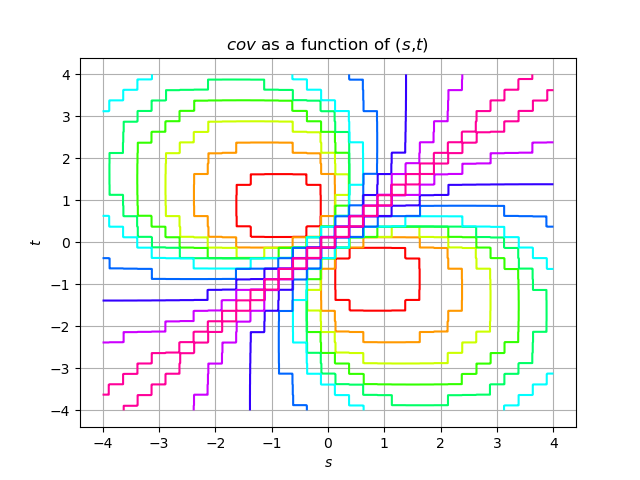

In [6]:
# Draw the covariance model
def f(x):
    return [covmodel([x[0]], [x[1]])[0, 0]]

func = ot.PythonFunction(2, 1, f)
func.setDescription(['$s$', '$t$', '$cov$'])
cov_graph = func.draw([-a] * 2, [a] * 2, [512] * 2)
cov_graph.setLegendPosition('')
cov_graph